**Name**:Sakshi Patil

**UID**:2021300096

**Class**:BE Comps

# Dataset

View the dataset at this link: [https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data](https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data)

# Description

This dataset provides an in-depth look at the profitability of e-commerce sales. It contains data on a variety of sales channels, including Shiprocket and INCREFF, as well as financial information on related expenses and profits. The columns contain data such as SKU codes, design numbers, stock levels, product categories, sizes and colors. In addition to this we have included the MRPs across multiple stores like Ajio MRP , Amazon MRP , Amazon FBA MRP , Flipkart MRP , Limeroad MRP Myntra MRP and PaytmMRP along with other key parameters like amount paid by customer for the purchase , rate per piece for every individual transaction Also we have added transactional parameters like Date of sale months category fulfilledby B2b Status Qty Currency Gross amt . This is a must-have dataset for anyone trying to uncover the profitability of e-commerce sales in today's marketplace


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [ ]:
data=pd.read_csv('Amazon Sale Report.csv')

In [6]:
pd.set_option('display.max_columns', None)

data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


**Bar Chart**

C:\Users\SAKSHI PATIL\AppData\Local\Temp\ipykernel_23092\874553495.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




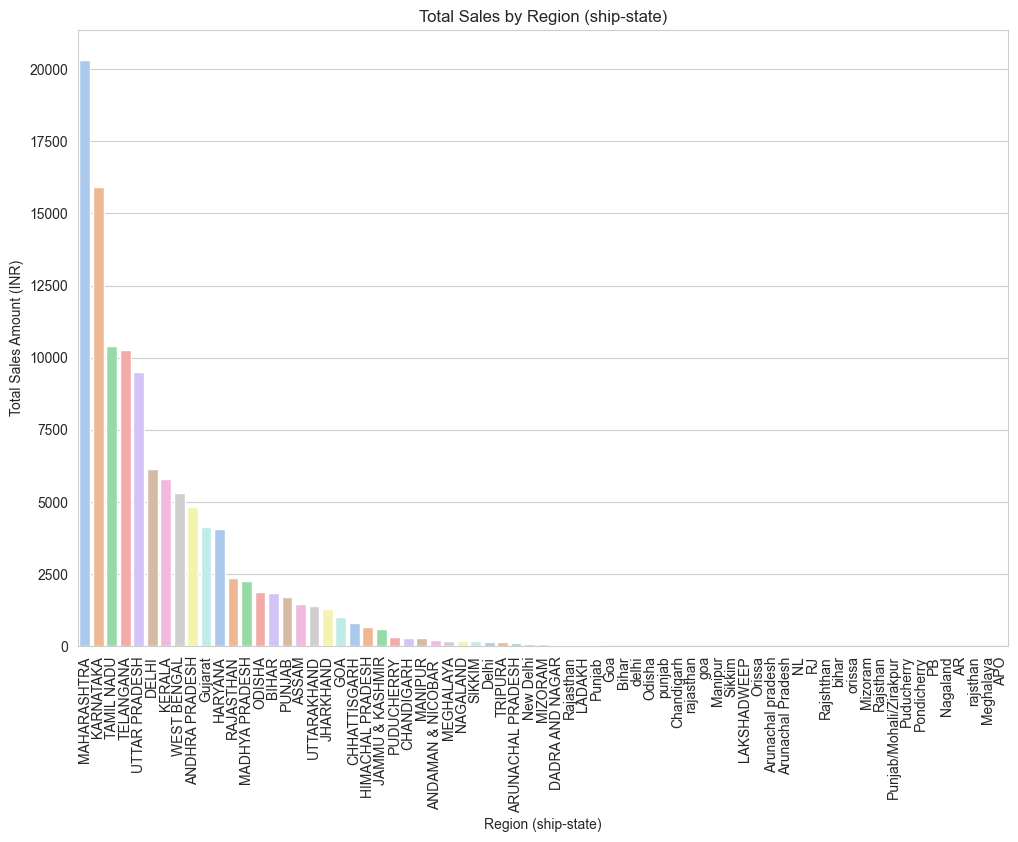

In [14]:
region_sales = data.groupby('ship-state')['Qty'].sum()
region_sales_sorted = region_sales.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=region_sales_sorted.index, y=region_sales_sorted.values, palette='pastel')
plt.title('Total Sales by Region (ship-state)')
plt.xlabel('Region (ship-state)')
plt.ylabel('Total Sales Amount (INR)')
plt.xticks(rotation=90)
plt.show()


The bar chart shows that Maharashtra is the top-performing region, bringing in the most revenue by a large margin. States like Karnataka and Tamil Nadu also contribute significantly, but they're still far behind Maharashtra. As we move down the list, other regions like Uttar Pradesh, Telangana, and West Bengal show decent sales, while many states contribute very little. This suggests that a few key regions are driving most of the sales. 


**Pie Chart**

In [8]:
category_qty = data.groupby('Category')['Qty'].sum().reset_index()
fig = px.pie(category_qty, values='Qty', names='Category',
             title='Proportion of Quantity by Category',
             hole=0)
fig.update_traces(textposition='inside', textinfo='percent+label', rotation=140)
fig.show()

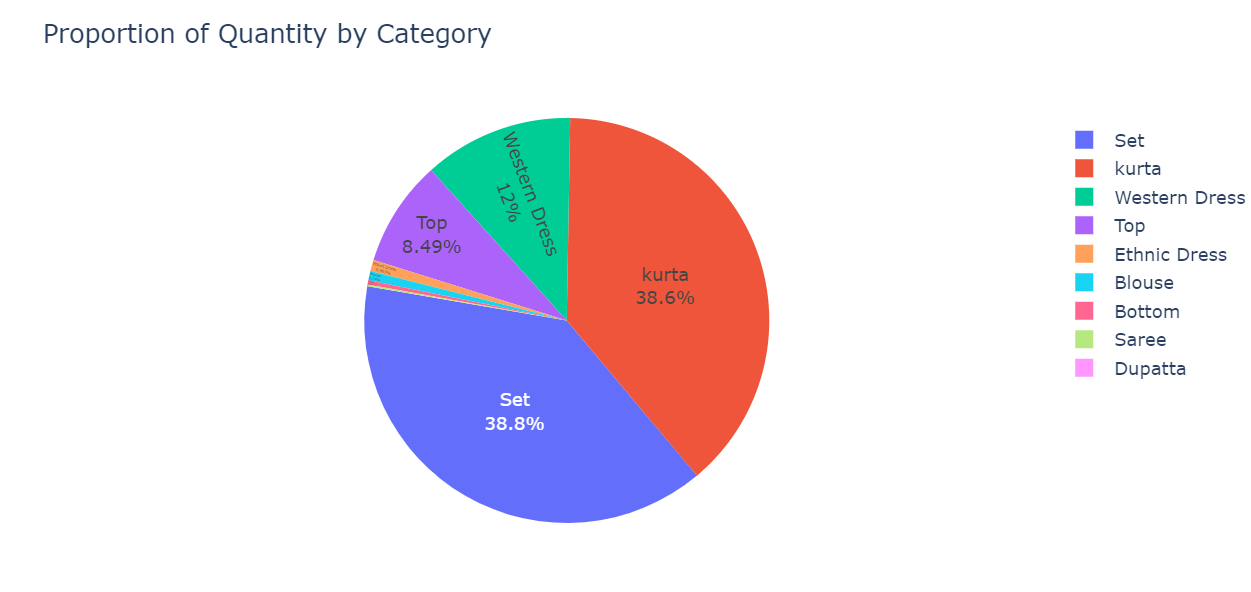

The pie chart reveals that Sets and Kurtas are the most popular items, making up nearly 80% of all sales. Western Dresses also have a solid share, but other categories like Tops and Ethnic Dresses are much less significant. Overall, this tells a story of a business heavily reliant on a few top-selling regions and product categories.

**Histogram**

In [9]:
import plotly.express as px

fig = px.histogram(data, x='Amount',
                   title='Histogram of Order Amount',
                   labels={'Amount': 'Amount (INR)', 'count': 'Frequency'},
                   nbins=5, 
                   color_discrete_sequence=['#636EFA'])  

fig.update_layout(
    xaxis_title='Amount (INR)',
    yaxis_title='Frequency',
    bargap=0.1, 
    height=400,
    width=600,
    showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis=dict(showgrid=True, gridcolor='LightGray'), 
    xaxis=dict(showgrid=True, gridcolor='LightGray')   
)

fig.show()


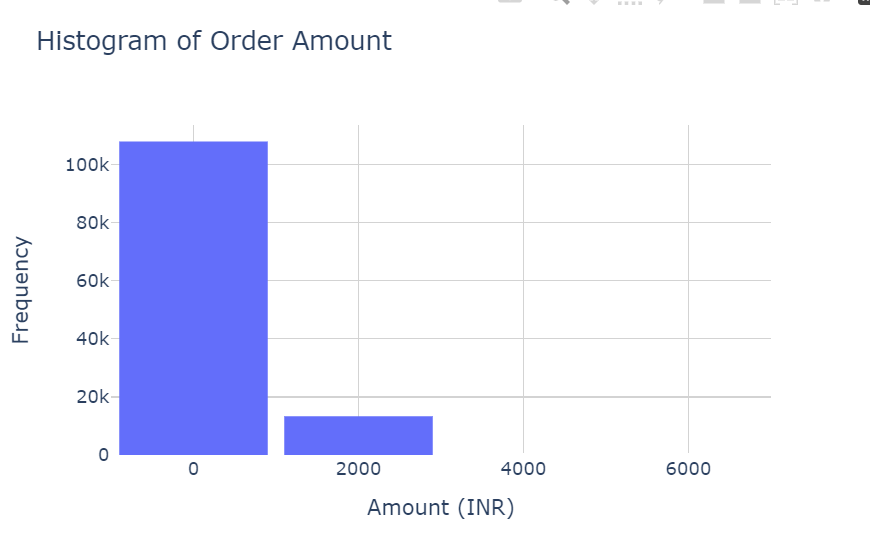

The histogram is showing the distribution of order amounts in INR. Most of the orders have a small value, with a massive concentration of orders below INR 2000, while only a few orders exceed this value. This suggests that the majority of transactions involve low amounts.

**Timeline**

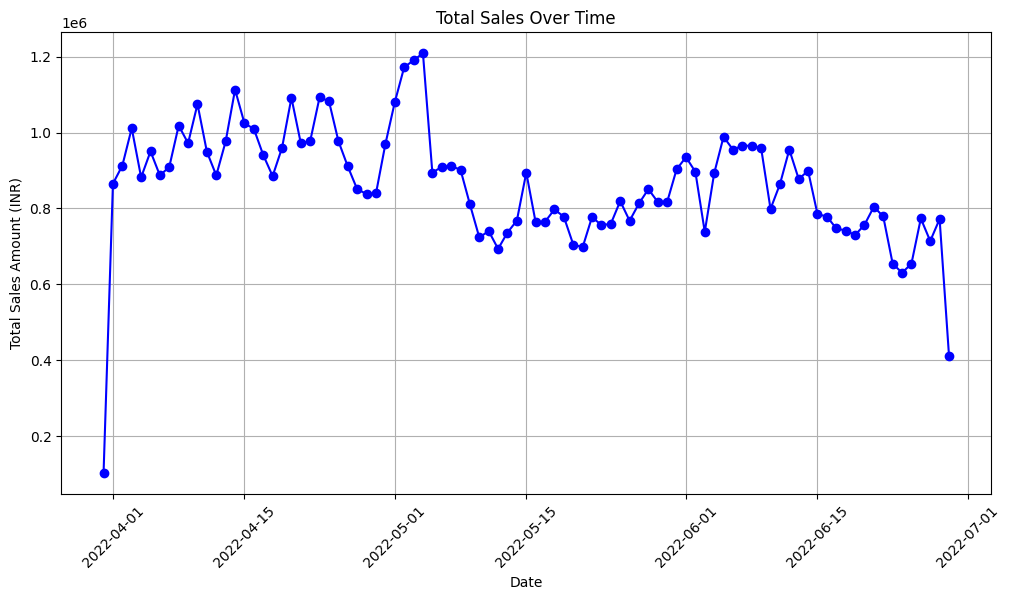

In [10]:
data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%y')
daily_sales = data.groupby('Date')['Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Amount'], marker='o', linestyle='-', color='blue')

plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount (INR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

The time series graph is tracking the total sales over time from April 2022 to July 2022. Initially, sales showed a steady growth, peaking around mid-April at over INR 1 million. However, after early May, the sales started fluctuating with a general downward trend, culminating in a sharp decline by the end of June. This pattern indicates some instability in sales, potentially due to changing market conditions or external factors affecting customer behavior.

**Scatter plot**

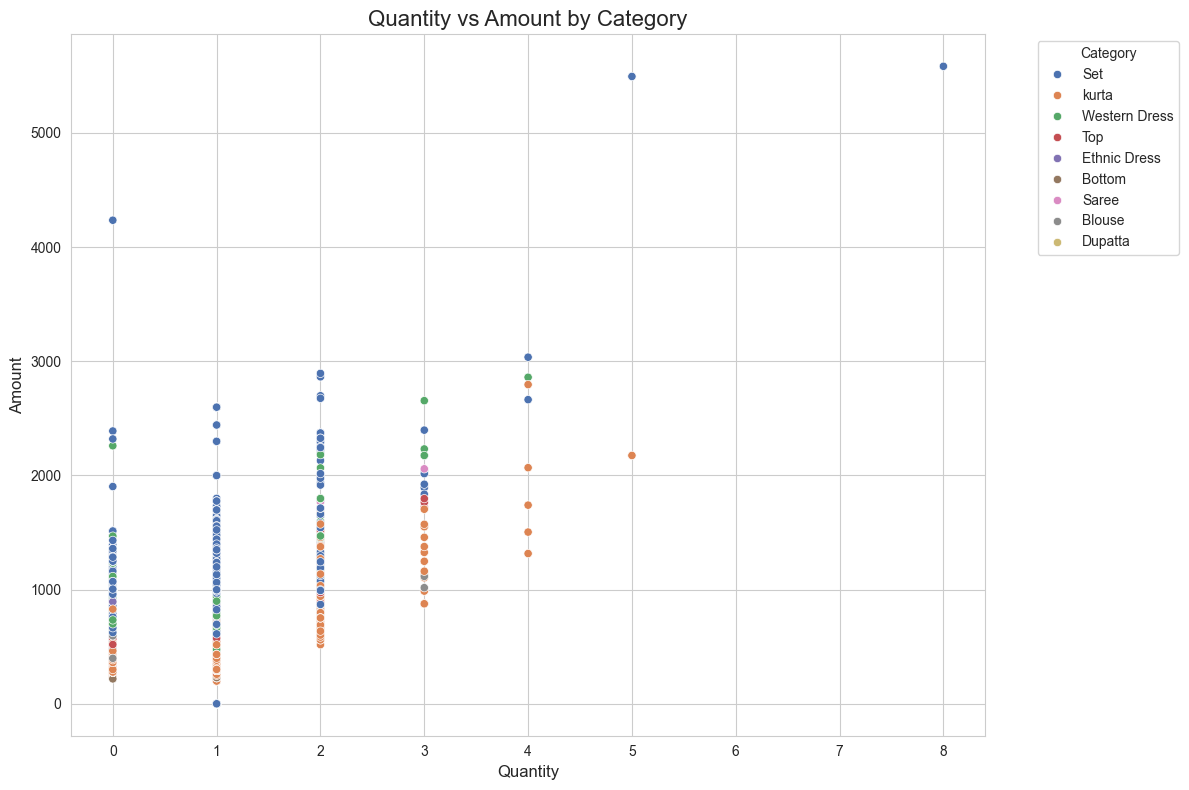

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Qty', y='Amount', hue='Category', palette='deep')

plt.title('Quantity vs Amount by Category', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Amount', fontsize=12)

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

The scatter plot shows the relationship between the quantity of items purchased and the corresponding amount spent, categorized by different types of clothing.The majority of purchases are for lower quantities (typically 1-3 items), and the amount spent tends to increase with quantity. For example, most Set purchases tend to be higher in amount compared to categories like Kurtas and Western Dresses. Notably, a few higher quantities (4 or more) are associated with larger amounts, primarily for Sets, indicating that higher purchases often lead to higher expenditures, particularly in certain categories.

**Bubble plot**

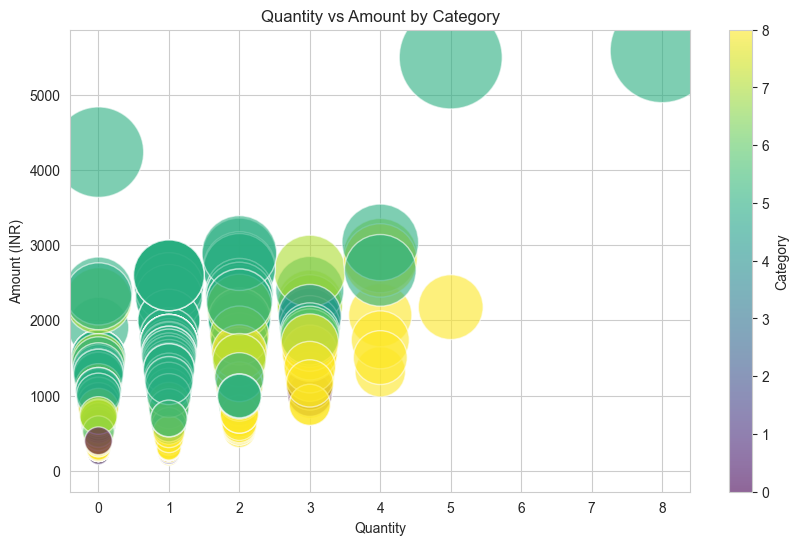

In [12]:
plt.figure(figsize=(10,6))

scatter = plt.scatter(
    data['Qty'], data['Amount'], 
    s=data['Amount'], 
    c=pd.Categorical(data['Category']).codes, 
    cmap='viridis', alpha=0.6, edgecolors='w'
)

plt.title('Quantity vs Amount by Category')
plt.xlabel('Quantity')
plt.ylabel('Amount (INR)')

plt.colorbar(scatter, label='Category')
plt.show()

The bubble plots with color-coding is  used  to represent different categories. The bubbles are concentrated on the left side of the chart, indicating that most purchases involve lower quantities. Some large bubbles appear higher on the chart, suggesting certain categories have high-priced items even in small quantities. 